In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm
import seaborn as sns
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [2]:
data = pd.read_csv('out/prediction_data.csv')
medals = [1.0, 2.0, 3.0]
medal_athletes = data[data['medal'].isin(medals)]

In [3]:
medal_athletes

,Unnamed: 0,name,gender,height,weight,noc,game_year,age,is_host,AG.LND.TOTL.K2,...,NY.GDP.MKTP.KD,NY.GDP.MKTP.KD.ZG,NY.GDP.PCAP.KD,NY.GDP.PCAP.KD.ZG,SH.XPD.CHEX.GD.ZS,SL.UEM.TOTL.ZS,SN.ITK.MSFI.ZS,SP.POP.GROW,SP.POP.TOTL,medal
6,6,Ashley Lawrence,1,163,59,CAN,2024,29.0,0,8.953429e+06,...,1.743957e+12,1.115198,47979.406403,0.118987,12.304889,5.709578,9.42,0.999836,3.880394e+07,3.0
10,10,Caileigh Filmer,1,169,76,CAN,2024,27.0,0,8.953429e+06,...,1.743957e+12,1.115198,47979.406403,0.118987,12.304889,5.709578,9.42,0.999836,3.880394e+07,3.0
12,12,Charity Williams,1,162,68,CAN,2024,27.0,0,8.953429e+06,...,1.743957e+12,1.115198,47979.406403,0.118987,12.304889,5.709578,9.42,0.999836,3.880394e+07,3.0
32,32,Kyra Constantine,1,175,63,CAN,2024,25.0,0,8.953429e+06,...,1.743957e+12,1.115198,47979.406403,0.118987,12.304889,5.709578,9.42,0.999836,3.880394e+07,3.0
42,42,Nichelle Prince,1,163,65,CAN,2024,29.0,0,8.953429e+06,...,1.743957e+12,1.115198,47979.406403,0.118987,12.304889,5.709578,9.42,0.999836,3.880394e+07,3.0


In [4]:
data = pd.read_csv('out/historical_athletes.csv')

medal_mapping = {
    'Gold': 1,
    'Silver': 2,
    'Bronze': 3,
}
gender_mapping = {
    "Male": 0,
    "Female": 1
}

data['medal'] = data['medal'].map(medal_mapping)
data['gender'] = data['gender'].map(gender_mapping)

data = data[data['medal'].isin(medals)]

data.describe()


,gender,height,weight,medal,game_year,age,AG.LND.TOTL.K2,EG.CFT.ACCS.ZS,EG.ELC.ACCS.ZS,EN.POP.DNST,...,NY.GDP.DEFL.KD.ZG,NY.GDP.MKTP.KD,NY.GDP.MKTP.KD.ZG,NY.GDP.PCAP.KD,NY.GDP.PCAP.KD.ZG,SH.XPD.CHEX.GD.ZS,SL.UEM.TOTL.ZS,SN.ITK.MSFI.ZS,SP.POP.GROW,SP.POP.TOTL
count,13674.000000,13674.000000,13674.000000,13674.000000,13674.000000,13674.000000,1.367400e+04,13674.000000,13674.000000,13674.000000,...,13674.000000,1.367400e+04,13674.000000,13674.000000,13674.000000,13674.000000,13674.000000,13674.000000,13674.000000,1.367400e+04
mean,0.389352,177.894837,72.259617,2.037809,1996.040369,26.131490,3.640399e+06,95.751871,97.336592,114.237504,...,16.285515,3.169098e+12,2.617298,25378.135533,2.000500,8.187595,8.475662,8.529546,0.640012,9.746178e+07
std,0.487621,10.619744,12.650297,0.819453,17.199314,5.391819,4.920935e+06,17.859609,13.544803,117.926079,...,61.980823,4.926299e+12,3.716018,17945.897863,3.562943,3.592945,4.745039,24.440139,0.726792,9.749479e+07
min,0.000000,142.000000,41.000000,1.000000,1960.000000,14.000000,2.030000e+03,-53.691749,-77.474407,0.795124,...,-17.460580,-2.722362e+11,-32.118570,-7579.291935,-31.177519,-2.203128,-5.951992,-262.221429,-3.629546,2.395110e+05
25%,0.000000,170.000000,63.000000,1.000000,1984.000000,23.000000,2.941100e+05,100.000000,99.993070,23.926102,...,1.555805,2.016697e+11,0.900586,8877.061983,0.436115,5.500000,5.530000,4.028571,0.247414,1.675496e+07
50%,0.000000,178.000000,72.000000,2.000000,2000.000000,26.000000,4.073397e+05,100.000000,100.000000,84.152704,...,3.527500,1.087189e+12,2.912503,26514.324812,2.153112,7.999176,7.392000,8.550000,0.649045,5.768533e+07
75%,1.000000,185.000000,81.000000,3.000000,2012.000000,29.000000,9.147420e+06,100.000000,100.000000,178.669281,...,7.982561,3.222611e+12,4.568680,37889.377347,3.881185,10.408973,10.581000,17.135714,0.987284,1.465969e+08
max,1.000000,212.000000,99.000000,3.000000,2020.000000,66.000000,1.638134e+07,105.714526,100.000000,612.867488,...,969.012963,1.969097e+13,18.008555,84637.013231,16.212148,27.899692,32.200000,127.350000,7.676428,3.315269e+08


In [5]:
# Gold medalists
g_data = data[data['medal'] == 1]
g_data.describe()

,gender,height,weight,medal,game_year,age,AG.LND.TOTL.K2,EG.CFT.ACCS.ZS,EG.ELC.ACCS.ZS,EN.POP.DNST,...,NY.GDP.DEFL.KD.ZG,NY.GDP.MKTP.KD,NY.GDP.MKTP.KD.ZG,NY.GDP.PCAP.KD,NY.GDP.PCAP.KD.ZG,SH.XPD.CHEX.GD.ZS,SL.UEM.TOTL.ZS,SN.ITK.MSFI.ZS,SP.POP.GROW,SP.POP.TOTL
count,4342.000000,4342.000000,4342.000000,4342.0,4342.000000,4342.000000,4.342000e+03,4342.000000,4342.000000,4342.000000,...,4342.000000,4.342000e+03,4342.000000,4342.000000,4342.000000,4342.000000,4342.000000,4342.000000,4342.000000,4.342000e+03
mean,0.390143,178.426301,72.650161,1.0,1996.356518,26.061032,4.316605e+06,95.855528,97.177338,107.246068,...,12.290796,4.152456e+12,2.812164,27523.193082,2.128342,8.772332,7.971390,9.545368,0.684650,1.176578e+08
std,0.487838,10.511716,12.651383,0.0,17.344884,5.305607,5.088317e+06,18.486736,14.535164,116.320220,...,59.337859,5.644573e+12,3.552570,18355.133944,3.385699,3.971496,4.364273,26.258974,0.740464,1.068094e+08
min,0.000000,143.000000,41.000000,1.0,1960.000000,14.000000,1.083000e+04,-38.343281,-77.474407,1.691137,...,-2.517261,-2.722362e+11,-21.168656,-7579.291935,-19.717433,-2.203128,-5.951992,-262.221429,-2.096943,1.329522e+06
25%,0.000000,171.000000,63.000000,1.0,1984.000000,22.000000,2.941100e+05,100.000000,100.000000,25.507625,...,1.792398,3.046968e+11,0.959879,9464.010742,0.691238,5.925634,5.451000,4.764286,0.265287,2.185660e+07
50%,0.000000,178.000000,73.000000,1.0,2000.000000,26.000000,5.475570e+05,100.000000,100.000000,59.546752,...,3.265326,1.375281e+12,3.262901,28509.143055,2.552719,8.224642,6.785948,9.800000,0.724676,8.042582e+07
75%,1.000000,186.000000,82.000000,1.0,2012.000000,29.000000,9.158960e+06,100.000000,100.000000,135.851152,...,6.710771,5.007285e+12,4.700000,40636.806616,3.881185,10.853456,9.942000,18.707143,0.997795,2.098960e+08
max,1.000000,211.000000,99.000000,1.0,2020.000000,57.000000,1.638134e+07,100.054150,100.000000,518.013068,...,969.012963,1.969097e+13,17.082429,84637.013231,13.049681,27.899692,30.091001,127.350000,5.752351,3.315269e+08


In [6]:
# Silver medalists
s_data = data[data['medal'] == 2]
s_data.describe()

,gender,height,weight,medal,game_year,age,AG.LND.TOTL.K2,EG.CFT.ACCS.ZS,EG.ELC.ACCS.ZS,EN.POP.DNST,...,NY.GDP.DEFL.KD.ZG,NY.GDP.MKTP.KD,NY.GDP.MKTP.KD.ZG,NY.GDP.PCAP.KD,NY.GDP.PCAP.KD.ZG,SH.XPD.CHEX.GD.ZS,SL.UEM.TOTL.ZS,SN.ITK.MSFI.ZS,SP.POP.GROW,SP.POP.TOTL
count,4473.000000,4473.000000,4473.000000,4473.0,4473.000000,4473.000000,4.473000e+03,4473.000000,4473.000000,4473.000000,...,4473.000000,4.473000e+03,4473.000000,4473.000000,4473.000000,4473.000000,4473.000000,4473.000000,4473.000000,4.473000e+03
mean,0.391907,177.833445,72.219987,2.0,1996.287503,26.172144,3.403597e+06,95.429372,97.308061,116.805488,...,17.484309,2.831348e+12,2.493468,25030.076124,1.879982,8.011964,8.597765,8.037989,0.640012,9.102043e+07
std,0.488231,10.685943,12.632938,0.0,16.917895,5.472967,4.818908e+06,18.408928,13.453374,121.201056,...,61.650319,4.574490e+12,3.688962,17504.557701,3.539497,3.353489,4.786754,25.608625,0.698184,9.394175e+07
min,0.000000,143.000000,41.000000,2.0,1960.000000,14.000000,1.083000e+04,-53.691749,-61.387473,0.795124,...,-2.517261,-2.722362e+11,-32.118570,-7579.291935,-31.177519,-2.203128,-5.284957,-242.635714,-2.443855,3.174140e+05
25%,0.000000,170.000000,63.000000,2.0,1984.000000,23.000000,2.935592e+05,100.000000,99.992937,23.926102,...,1.549889,2.056580e+11,0.878704,8554.822300,0.254474,5.520000,5.690930,3.971429,0.247414,1.628178e+07
50%,0.000000,178.000000,72.000000,2.0,2000.000000,26.000000,4.073106e+05,100.000000,100.000000,85.632245,...,3.527500,9.295505e+11,2.764648,26514.324812,2.076625,7.832103,7.500000,8.135714,0.647183,5.323575e+07
75%,1.000000,185.000000,82.000000,2.0,2012.000000,29.000000,8.965590e+06,100.000000,100.000000,178.669281,...,7.943127,2.604143e+12,4.560985,37884.391321,3.881185,10.164293,10.628000,16.771429,0.987284,1.440673e+08
max,1.000000,212.000000,99.000000,2.0,2020.000000,66.000000,1.638134e+07,103.255632,100.000000,518.013068,...,969.012963,1.969097e+13,17.742718,84637.013231,14.686185,18.756220,30.091001,103.478571,3.966988,3.315269e+08


In [7]:
# Bronze medalists|
b_data = data[data['medal'] == 3]
b_data.describe()

,gender,height,weight,medal,game_year,age,AG.LND.TOTL.K2,EG.CFT.ACCS.ZS,EG.ELC.ACCS.ZS,EN.POP.DNST,...,NY.GDP.DEFL.KD.ZG,NY.GDP.MKTP.KD,NY.GDP.MKTP.KD.ZG,NY.GDP.PCAP.KD,NY.GDP.PCAP.KD.ZG,SH.XPD.CHEX.GD.ZS,SL.UEM.TOTL.ZS,SN.ITK.MSFI.ZS,SP.POP.GROW,SP.POP.TOTL
count,4859.000000,4859.000000,4859.000000,4859.0,4859.000000,4859.000000,4.859000e+03,4859.000000,4859.000000,4859.000000,...,4859.000000,4.859000e+03,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000,4.859000e+03
mean,0.386293,177.476435,71.947108,3.0,1995.530356,26.157028,3.254133e+06,95.956122,97.505166,118.121066,...,18.751630,2.601290e+12,2.557158,23781.722661,1.997205,7.826753,8.813876,8.074315,0.600122,8.534424e+07
std,0.486949,10.636535,12.658590,0.0,17.316968,5.393476,4.799346e+06,16.740427,12.684947,116.028717,...,64.386850,4.390759e+12,3.874123,17791.642298,3.731705,3.379756,4.990252,21.447141,0.738018,8.879845e+07
min,0.000000,142.000000,41.000000,3.0,1960.000000,14.000000,2.030000e+03,-42.891897,-70.849207,0.795124,...,-17.460580,-2.722362e+11,-32.118570,-7579.291935,-31.177519,-2.203128,-5.951992,-262.221429,-3.629546,2.395110e+05
25%,0.000000,170.000000,62.000000,3.0,1984.000000,23.000000,2.633100e+05,100.000000,99.992402,23.805650,...,1.547301,1.610356e+11,0.928813,7449.658122,0.449644,5.293636,5.690930,3.592857,0.135432,1.628178e+07
50%,0.000000,178.000000,72.000000,3.0,2000.000000,26.000000,3.647000e+05,100.000000,100.000000,93.049263,...,3.545390,9.712537e+11,2.912503,24634.962088,2.151723,7.614358,7.763000,8.007143,0.620164,5.505258e+07
75%,1.000000,185.000000,81.000000,3.0,2010.000000,29.000000,8.358140e+06,100.000000,100.000000,192.365843,...,9.085205,2.604143e+12,4.560985,35651.015637,3.871731,9.888435,10.726197,16.092857,0.987284,1.276290e+08
max,1.000000,210.000000,99.000000,3.0,2020.000000,58.000000,1.638134e+07,105.714526,100.000000,612.867488,...,942.306569,1.969097e+13,18.008555,84637.013231,16.212148,18.756220,32.200000,111.435714,7.676428,3.315269e+08


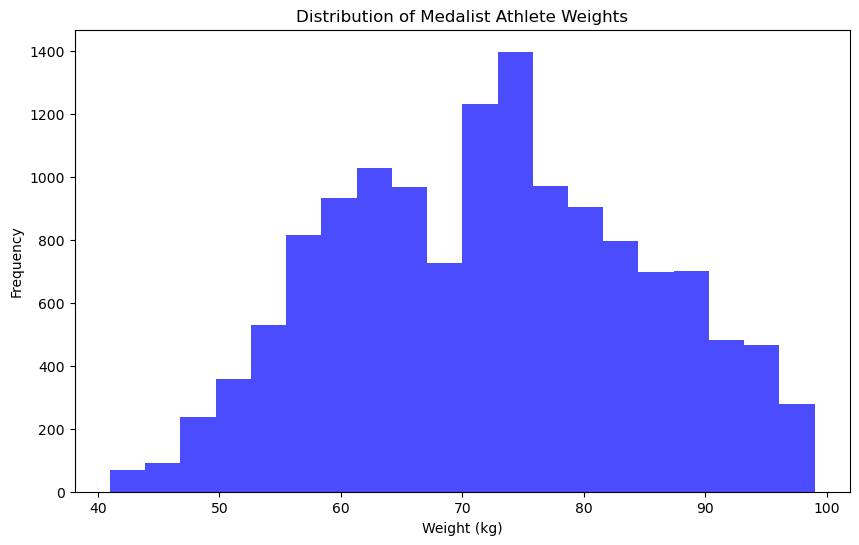

In [8]:
plt.figure(figsize=(10, 6))
plt.hist(data['weight'], bins=20, color='blue', alpha=0.7)
plt.title('Distribution of Medalist Athlete Weights')
plt.xlabel('Weight (kg)')
plt.ylabel('Frequency')
plt.show()

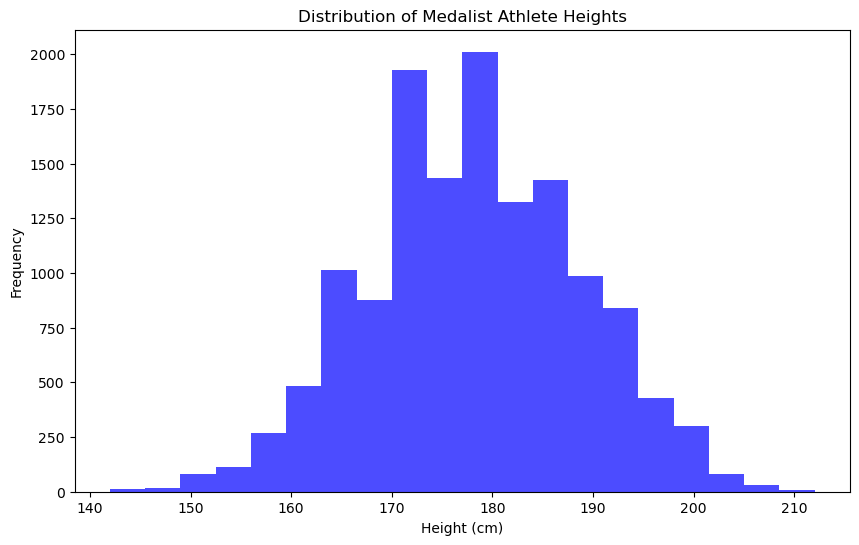

In [9]:
plt.figure(figsize=(10, 6))
plt.hist(data['height'], bins=20, color='blue', alpha=0.7)
plt.title('Distribution of Medalist Athlete Heights')
plt.xlabel('Height (cm)')
plt.ylabel('Frequency')
plt.show()

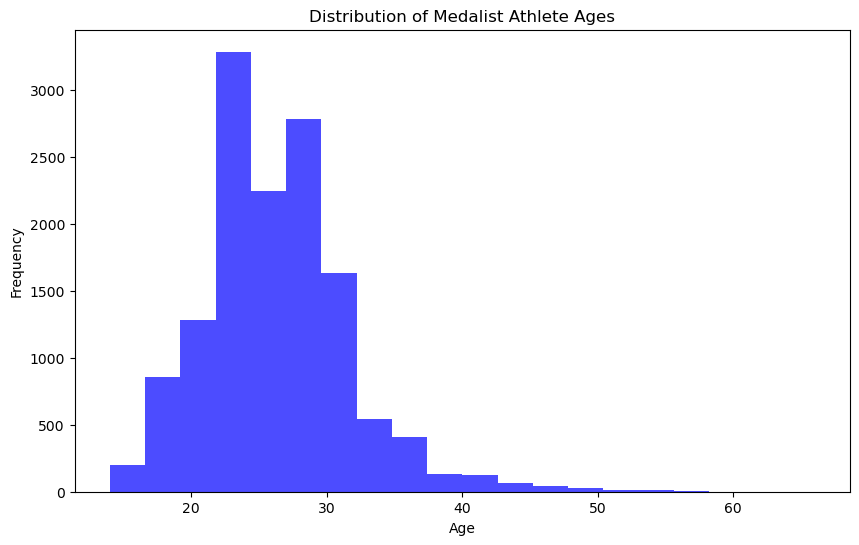

In [10]:
plt.figure(figsize=(10, 6))
plt.hist(data['age'], bins=20, color='blue', alpha=0.7)
plt.title('Distribution of Medalist Athlete Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [11]:
relevant_columns = ['gender', 'height', 'weight', 'age', 'medal', 'AG.LND.TOTL.K2', 'EG.CFT.ACCS.ZS', 'EG.ELC.ACCS.ZS',
                    'EN.POP.DNST', 'NY.ADJ.NNTY.KD', 'NY.GDP.DEFL.KD.ZG', 'NY.GDP.MKTP.KD', 'NY.GDP.MKTP.KD.ZG',
                    'NY.GDP.PCAP.KD', 'NY.GDP.PCAP.KD.ZG', 'SH.XPD.CHEX.GD.ZS', 'SL.UEM.TOTL.ZS', 'SN.ITK.MSFI.ZS',
                    'SP.POP.GROW', 'SP.POP.TOTL'

]
selected_data = data[relevant_columns]

corr_matrix = selected_data.corr()

                     height    weight  AG.LND.TOTL.K2  EG.CFT.ACCS.ZS  \
height                  NaN  0.831309             NaN             NaN   
weight             0.831309       NaN             NaN             NaN   
AG.LND.TOTL.K2          NaN       NaN             NaN             NaN   
EG.CFT.ACCS.ZS          NaN       NaN             NaN             NaN   
EG.ELC.ACCS.ZS          NaN       NaN             NaN        0.890177   
NY.ADJ.NNTY.KD          NaN       NaN             NaN             NaN   
NY.GDP.MKTP.KD          NaN       NaN             NaN             NaN   
NY.GDP.MKTP.KD.ZG       NaN       NaN             NaN             NaN   
NY.GDP.PCAP.KD          NaN       NaN             NaN             NaN   
NY.GDP.PCAP.KD.ZG       NaN       NaN             NaN             NaN   
SH.XPD.CHEX.GD.ZS       NaN       NaN             NaN             NaN   
SP.POP.TOTL             NaN       NaN        0.713337             NaN   

                   EG.ELC.ACCS.ZS  NY.ADJ.NNTY.KD 

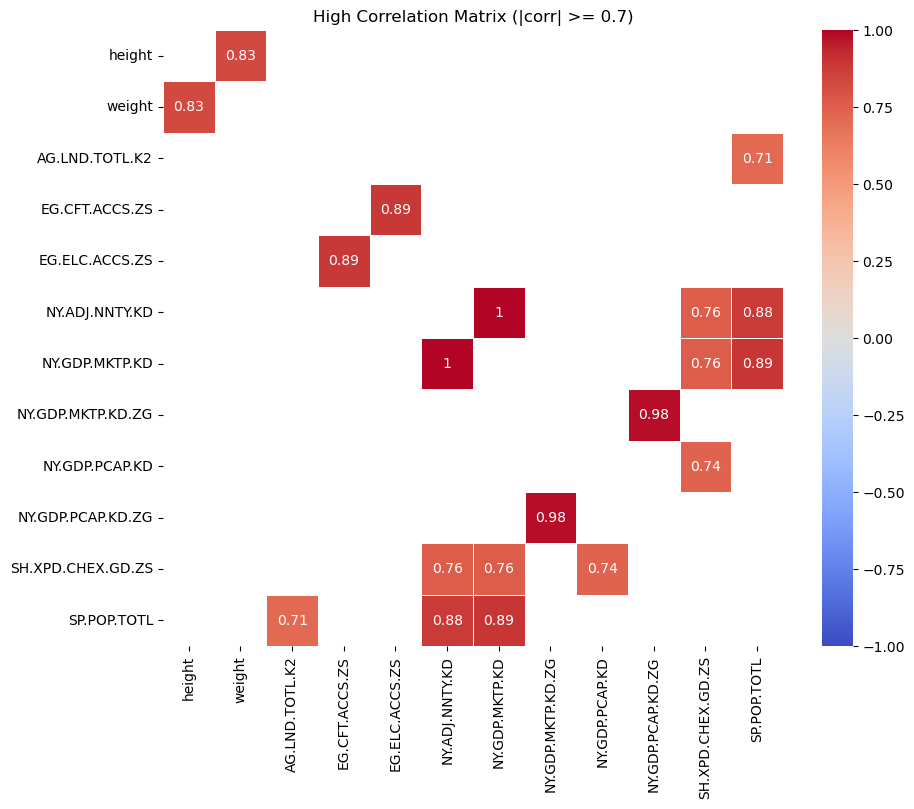

In [12]:
threshold = 0.7

high_corr = corr_matrix[(corr_matrix.abs() >= threshold) & (corr_matrix != 1)]
high_corr = high_corr.dropna(axis=0, how='all').dropna(axis=1, how='all')

print(high_corr)

plt.figure(figsize=(10, 8))
sns.heatmap(high_corr, annot=True, cmap='coolwarm', linewidths=0.5, vmin=-1, vmax=1)
plt.title('High Correlation Matrix (|corr| >= 0.7)')
plt.show()

In [13]:
X = data[['height', 'weight', 'age', 'AG.LND.TOTL.K2', 'EG.CFT.ACCS.ZS', 'EG.ELC.ACCS.ZS',
                    'EN.POP.DNST', 'NY.ADJ.NNTY.KD', 'NY.GDP.DEFL.KD.ZG', 'NY.GDP.MKTP.KD', 'NY.GDP.MKTP.KD.ZG',
                    'NY.GDP.PCAP.KD', 'NY.GDP.PCAP.KD.ZG', 'SH.XPD.CHEX.GD.ZS', 'SL.UEM.TOTL.ZS', 'SN.ITK.MSFI.ZS',
                    'SP.POP.GROW', 'SP.POP.TOTL']]
y = data['medal']

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  medal   R-squared:                       0.025
Model:                            OLS   Adj. R-squared:                  0.024
Method:                 Least Squares   F-statistic:                     19.79
Date:                Wed, 31 Jul 2024   Prob (F-statistic):           9.14e-64
Time:                        13:37:19   Log-Likelihood:                -16503.
No. Observations:               13674   AIC:                         3.304e+04
Df Residuals:                   13655   BIC:                         3.319e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 2.5151      0.17

In [14]:
data['age_group'] = pd.cut(data['age'], bins=[0, 20, 30, 40, 50, 60, 70], 
                           labels=['0-20', '21-30', '31-40', '41-50', '51-60', '61-70']).astype('category')

data['medal'] = pd.to_numeric(data['medal'], errors='coerce')
data['age_group'] = data['age_group'].astype('category')
data = data.dropna(subset=['medal', 'age_group'])

# ANOVA
f_value, p_value = stats.f_oneway(
    data[data['age_group'] == '0-20']['medal'],
    data[data['age_group'] == '21-30']['medal'],
    data[data['age_group'] == '31-40']['medal'],
    data[data['age_group'] == '41-50']['medal'],
    data[data['age_group'] == '51-60']['medal'],
    data[data['age_group'] == '61-70']['medal'],
)

print('ANOVA F-value:', f_value)
print('ANOVA p-value:', p_value)

ANOVA F-value: 0.2217486318349896
ANOVA p-value: 0.9533200196397607


In [15]:
model = ols('medal ~ C(age_group)', data=data).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
print(aov_table)

                   sum_sq       df         F   PR(>F)
C(age_group)     0.744736      5.0  0.221749  0.95332
Residual      9180.708021  13668.0       NaN      NaN


In [16]:
tukey = pairwise_tukeyhsd(endog=data['medal'], groups=data['age_group'], alpha=0.05)
print(tukey)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
  0-20  21-30   0.0062 0.9998 -0.0571 0.0694  False
  0-20  31-40   0.0159 0.9922 -0.0618 0.0936  False
  0-20  41-50   -0.011    1.0 -0.1858 0.1639  False
  0-20  51-60   0.1207 0.9606 -0.2902 0.5315  False
  0-20  61-70  -0.0309    1.0 -1.6836 1.6219  False
 21-30  31-40   0.0097 0.9964 -0.0465  0.066  False
 21-30  41-50  -0.0171 0.9997 -0.1836 0.1493  False
 21-30  51-60   0.1145 0.9674 -0.2928 0.5218  False
 21-30  61-70   -0.037    1.0 -1.6889 1.6149  False
 31-40  41-50  -0.0269 0.9978 -0.1993 0.1456  False
 31-40  51-60   0.1048 0.9785 -0.3051 0.5146  False
 31-40  61-70  -0.0468    1.0 -1.6992 1.6057  False
 41-50  51-60   0.1316 0.9569 -0.3071 0.5703  False
 41-50  61-70  -0.0199    1.0 -1.6798   1.64  False
 51-60  61-70  -0.1515 0.9999 -1.8525 1.5495  False
---------------------------------------------------
